# <span style="color:#D291BC">Secuencias y formatos</span>

## <span style="color:#957DAD">Índice</span>

### Contenido

+ <a href="#Bio.Seq" style="color:#E18AAA">Bio.Seq</a>
+ <a href="#Fasta" style="color:#E18AAA">Fasta</a>
+ <a href="#Fastq" style="color:#E18AAA">Fastq</a>
+ <a href="#GenBank" style="color:#E18AAA">GenBank</a>
+ <a href="#Protein_Data_Bank" style="color:#E18AAA">Protein Data Bank</a>
+ <a href="#BLAST_Output" style="color:#E18AAA">BLAST Output</a>
+ <a href="#File_Format_Conversions" style="color:#E18AAA">File Format Conversions</a>

### Ejercicios
+ <a href="#Ejercicio_1" style="color:#058B8C">Ejercicio 1</a>
+ <a href="#Ejercicio_2" style="color:#058B8C">Ejercicio 2</a>
+ <a href="#Ejercicio_3" style="color:#058B8C">Ejercicio 3</a>
+ <a href="#Ejercicio_4" style="color:#058B8C">Ejercicio 4</a>
+ <a href="#Ejercicio_5" style="color:#058B8C">Ejercicio 5</a>
+ <a href="#Ejercicio_6" style="color:#058B8C">Ejercicio 6</a>


<p id="#Bio.Seq"></p>



### Biopython documentation

[Biopython wiki page](http://biopython.org/)

[Getting started](http://biopython.org/wiki/Category%3AWiki_Documentation)

[Biopython tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html#chapter:Bio.SeqIO)

[Complete tree of Biopython Classes](http://biopython.org/DIST/docs/api/Bio-module.html)

<p id="#Bio.Seq"></p>

## <span style="color:#957DAD">Bio.Seq</span>

In [1]:
import Bio.Seq                          
seqobj = Bio.Seq.Seq('ATGCGATCGAGC')     
# convert to string with str(seqobj)
seq_str = str(seqobj)
print('{} tiene {} nucleotidos'.format( seq_str , len(seq_str)))


ATGCGATCGAGC tiene 12 nucleotidos


### From ... import ...

Otra manera de importar módulos es con `from ... import ...` . Esto evita que tengamos que escribir el nombre de la clase todo el tiempo. Bio.Seq es el nombre de la clase. Bio es la superclase. Seq es la subclase dentro de Bio. Se escribe Bio.Seq. Seq tiene diferentes subclases, de las cuales una es llamada Seq. Así que tenemos Bio.Seq.Seq. Para hacer el proceso más sencillo, llamamos Seq() después de importar con `from ... import ...` de esta manera.

In [2]:
from Bio.Seq import Seq
seqobj=Seq('ATGCGATCGAGC')
seq_str=str(seqobj)
protein = seqobj.translate()
prot_str = str(protein)
print('{} se traduce a {}'.format(seq_str,prot_str))


ATGCGATCGAGC se traduce a MRSS


In [3]:
seqobj.complement()

Seq('TACGCTAGCTCG')

In [4]:
rna = seqobj.transcribe()
rna

Seq('AUGCGAUCGAGC', RNAAlphabet())

In [5]:
rna.back_transcribe()

Seq('ATGCGATCGAGC', DNAAlphabet())


### Extraer una subsecuencia

Puedes utilizar un rango [0:3] para obtener el primer codón



In [6]:
seqobj=Seq('ATGCGATCGAGC')
seqobj[0:3]

Seq('ATG')

Vamos a utilizar expresiones Regulares en conjunción con BioPython para obtener cada codón

In [7]:
seqobj=Seq('ATGCGATCGAGC')
import re
for codon in re.findall(r"(.{3})",str(seqobj)):
    print(codon)

ATG
CGA
TCG
AGC


### String matching

Buscar un patrón (ACG)

In [8]:
#nt_search
from Bio.Seq import Seq
from Bio import SeqUtils
pattern = Seq("ACG")
sequence = Seq("ATGCGCGACGGCGTGATCAGCTTATAGCCGTACGACTGCTGCAACGTGACTGAT")
results = SeqUtils.nt_search(str(sequence),pattern)
print(results)

['ACG', 7, 31, 43]


In [9]:
results_rc = SeqUtils.nt_search(str(sequence),pattern.reverse_complement())
print(results_rc)

['CGT', 11, 28, 44]


### Secuencia consenso


<div>
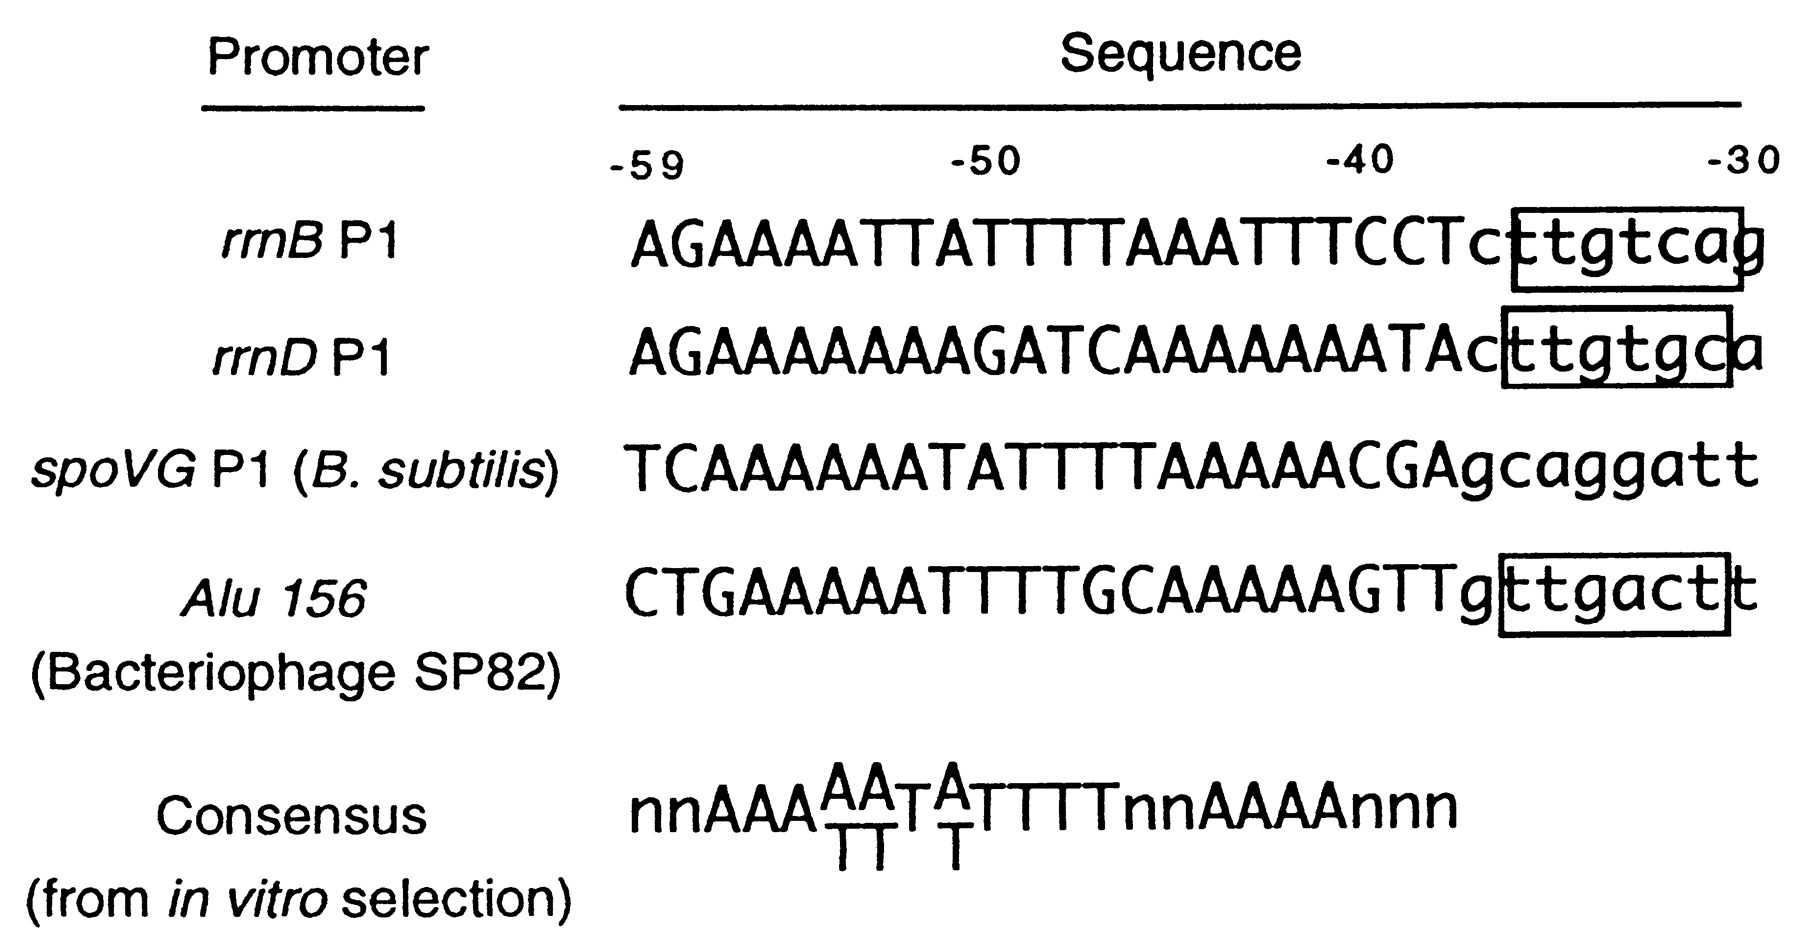
</div>


In [10]:
from Bio import SeqUtils
consensus = "RGWYV"
sequence = "CGTAGCTAGCTCAGAGCAGGGACACGTGCTAGCAACAGCGCT"
SeqUtils.nt_search(sequence,consensus)


['[AG]G[AT][CT][ACG]', 19]

In [11]:
sequence[19:19+len(consensus)]

'GGACA'

No son mutables

In [12]:
seqobj[0]="T"

TypeError: 'Seq' object does not support item assignment

In [13]:
mut_seq = seqobj.tomutable()
mut_seq

MutableSeq('ATGCGATCGAGC')

In [14]:
mut_seq[0]="T"
print(mut_seq)

TTGCGATCGAGC


In [15]:
from Bio.Seq import MutableSeq

mut_seq = MutableSeq('ATGCGATCGAGC')

In [16]:
mut_seq[0]="T"
print(mut_seq)

TTGCGATCGAGC


In [17]:
mut_seq.reverse()
print("\nreverso: %s" % (mut_seq))

mut_seq.complement()
print("\ncomplemento: %s" % (mut_seq))

mut_seq.reverse_complement()
print("\nreverso_complemento: %s" % (mut_seq))

print("\nNota: Seq no es mutable; por ende, el método reverse() no es aplicable aquí:")
seqobj.reverse()


reverso: CGAGCTAGCGTT

complemento: GCTCGATCGCAA

reverso_complemento: TTGCGATCGAGC

Nota: Seq no es mutable; por ende, el método reverse() no es aplicable aquí:


AttributeError: 'Seq' object has no attribute 'reverse'

In [18]:
seqobj

Seq('ATGCGATCGAGC')

In [19]:
from Bio.SeqUtils import GC
GC(seqobj)

58.333333333333336

In [20]:
gc='AG'

In [21]:
GC(gc)

50.0

In [22]:
from Bio.SeqUtils import molecular_weight #Calculate the molecular mass 
molecular_weight(seqobj)


3750.3901999999994

In [23]:
print(seqobj.count("A"))  # counts how many As are in sequence
print(seqobj.count("AT"))
print(seqobj.find("ATG")) # find coordinate of ATG (-1 for not found)

3
2
0


In [24]:
seqobj

Seq('ATGCGATCGAGC')

In [25]:
print(seqobj.find("GC"))

2


In [26]:
print(seqobj.find("AAA"))

-1


In [27]:
# seqobj[0:3]

<a id="Fasta"></a>


## <span style="color:#957DAD">Fasta</span>

FASTA: Formato muy básico que consta de un encabezado precedido por '>' donde se da información, y tras un salto de línea la secuencia de ADN o aminoácidos. Un ejemplo de secuencia en formato FASTA

In [28]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\seq.nt.fa  | findstr "^[1-5]:"

In [29]:
%%bash
less ./archivos_trabajo/seq.nt.fa

./archivos_trabajo/seq.nt.fa: No such file or directory


### Objetos SeqRecord

SeqIO.Parse genera objetos Bio.SeqRecord.SeqRecord. 

Atributos Principales:

- id - Identificador como un locus tag (cadena)
- seq - La secuencia en sí (Objeto Seq or similar)

Accede estos con `sr.id` y `sr.seq`. `str(sr.seq)` obtiene la cadena de secuencia.

Atributos adicionales:

- name - Nombre de la secuencia, e.g. nombre del gen (string)
- description - Texto adicional (cadena)
- dbxrefs - Lista de referencias cruzadas de bases de datos (lista de cadenas)
- features - Cualquier (sub)features definidos (lista de objetos SeqFeature)
- annotations - Más información sobre la secuencia (dictionary). La mayoría de las entradas son cadenas, o lista de cadenas.
- letter_annotations - Anotación por letra / símbolo (diccionario restringido). Esto contiene secuencias de Python (listas, cadenas o tuplas) cuya longitud coincide con la de la secuencia. Un uso tipico sería tener una lista de enteros representando puntuaciones de calidad de secuenciación, o una cadena representando la estructura secundaria.



### Leer un archivo FASTA


Consigue ayuda con el parse() método con

In [31]:
from Bio import SeqIO
filename = "example.fasta"
for seq_record in SeqIO.parse(filename, "fasta"):
    print('ID {}'.format(seq_record.id))
    print('len {}'.format(len(seq_record)))
    print('Traducción {}'.format(seq_record.seq.translate(to_stop=False)))
#     print('Traducción {}'.format(seq_record.seq.translate(to_stop=False,cds=True)))
    
#cds revisa que tenga un codón de inicio

ID araC
len 876
Traducción MAEAQNDPLLPGYSFNAHLVAGLTPIEANGYLDFFIDRPLE*KVIFSISPFAVRGW*KIRREFVCRPGDILLFPPGEIHHYGRHPEAREWYHQWVYFRPRAYWHEWLNWPSIFANTGFFRPDEAHQPHFSDLFGQIINAGQGEGRYSELLAINLLEQLLLRRMEAINESLHPPMDNRVREACQYISDHLADSNFDIASVAQHVCLSPSRLSHLFRQQLGISVLSWREDQRISQAKLLLSTTRMPIATVGRNVGFDDQLYFSRVFKKCTGASPSEFRAGCEEKVNDVAVKLS*


In [ ]:
# from Bio import SeqIO
for seq_record in SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta"):   # Da nombre del archivo y formato
    print('ID',seq_record.id)
    print('Secuencia',str(seq_record.seq))
    print('Longitud',len(seq_record))
    print('Traduccion',seq_record.seq.translate(to_stop=True))

In [ ]:
seq_record.seq.complement()

In [ ]:
seq_record.seq.reverse_complement()

In [ ]:
rna = seq_record.seq.transcribe()
rna

In [ ]:
rna.back_transcribe()

<a id="Ejercicio_1"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 1</h2>
<p>Un ORF inicia con un codón inicial y termina, ya sea con un codón final o al final de la cádena.
</p>
<p>Utilizando como input una cadena de ADN, obtener la cadena proteica de mayor longitud que puede ser traducida de cualquiera de sus ORF.
</p>
<p>Si más de una cadena protéica de longitud maxima existe, entonces podrás emitir cualquier solución.</p>
<h3 id="sample-dataset">Conjunto de datos de muestra</h3>
<div class="codehilite"><pre>AGCCATGTAGCTAACTCAGGTTACATGGGGATGACCCCGCGACTTGGATTAGAGTCTCTTTTGGAATAAGCCTGAATGATCCGAGTAGCATCTCAG
</pre></div>


<h3 id="sample-output">Resultado emitido de muestra</h3>
<div class="codehilite"><pre>MLLGSFRLIPKETLIQVAGSSPCNLS
</pre></div>
</div>

### Convierte un archivo fasta a diccionario de Python en una línea

Hay tres maneras de realizar esto que utilizan mayor memoria si quisieras mayor flexibilidad. `Bio.SeqIO.to_dict()` es la más flexible pero también lee el archivo fasta en la memoria como un diccionario de Python; así que, quiza lleve mucho tiempo al igual que memoria.

In [ ]:
id_dict = SeqIO.to_dict(SeqIO.parse('archivos_trabajo/seq.nt.fa', 'fasta'))
id_dict

Consigamos información de nuestro diccionario

In [ ]:
print(id_dict['seq4'], '\n')
print(id_dict['seq4'].seq, '\n')

print(type(id_dict['seq4'].seq), '\n')

print(str(id_dict['seq4'].seq.transcribe()), '\n')



<a id="Ejercicio_2"></a>

<div class="alert alert-block alert-info">
<h2 id="problem">Ejercicio 2</h2>
    
1. Teniendo como input un archivo fasta, crea un diccionario de todas las secuencias en tu atchivo FASTA.

2. Encuentra todos los codones en tu primer marco de lectura. 

3. Imprime los codones de cada secuncia en formato FASTA. 

   ```
   >my_seq_marco_1
   ATG TTC ATC
   ```


4. Imprime los codones de cada secuencia en los 6 marcos lectura.
</div>





In [ ]:
id_list = list(SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta"))
print(id_list[-1].id, '\n')
print(id_list[-1].seq, '\n')

In [ ]:
id_list

In [ ]:
id_dict['seq4'].format('fasta')


In [ ]:
id_list[-1].format('fasta')

In [ ]:
id_dict['Ecoli'] = id_dict.pop('seq4')

In [ ]:
id_dict

In [ ]:
with open("example.fasta", "w") as output_handle:
    SeqIO.write(id_dict.values(), output_handle, "fasta")

In [ ]:
%%bash
less ./example.fasta

In [ ]:
id_dict['Ecoli'].id='Escherichia'

In [ ]:
id_dict['Ecoli'].name='Escherichia_2'

In [ ]:
id_dict['Ecoli'].description='coli W3110'

In [ ]:
id_dict

In [ ]:
with open("example.fasta", "w") as output_handle:
    SeqIO.write(id_dict.values(), output_handle, "fasta")

In [ ]:
%%bash
less ./example.fasta

In [ ]:
# with open("example.fasta", "w") as output_handle:
#     SeqIO.write(id_dict.values(), output_handle, "fasta")

In [ ]:
SeqIO.write(id_list, "example2.fasta", "fasta")

Archivos grandes

In [ ]:
record_dict = SeqIO.index("example2.fasta", "fasta")
print(record_dict["seq1"])

In [ ]:
record_dict

In [ ]:
%%bash
grep -o -E "^>\w+" example2.fasta | tr -d ">" 

In [ ]:
seq_ids=['seq4','seq1']

In [ ]:
with open("filtered.fasta", "w") as out_handle:
    for record in SeqIO.parse('archivos_trabajo/seq.nt.fa', "fasta"):
        if record.id in seq_ids:
            SeqIO.write(record, out_handle, "fasta")

In [ ]:
%%bash
less ./filtered.fasta

https://2-bitbio.com/2017/04/bash-commands-for-manipulating-fasta.html

<a id="Fastq"></a>

## <span style="color:#957DAD">Fastq</span>

+ Un identificador de secuencia con información sobre la secuenciación. Los contenidos de esta línea varian, basados en el software de conversión BCL a FASTQ usado.
+ La secuencia ( A, C, T, G y N).
+ Un separador, que simplemente es un signo de más (+).
+ Puntuaciones de calidad. Estas son codificadas con Phred +33, usando caracteres ASCII para representar puntuaciones de calidad numéricas.

In [ ]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\sample.fastq | findstr "^[1-8]:"

In [ ]:
%%bash
head -8 ./archivos_trabajo/sample.fastq

[![Img Alt Text](http://img.youtube.com/vi/womKfikWlxM/0.jpg)](https://www.youtube.com/watch?v=womKfikWlxM "Illumina")


### ¿Qué significa el identificador?


<div>
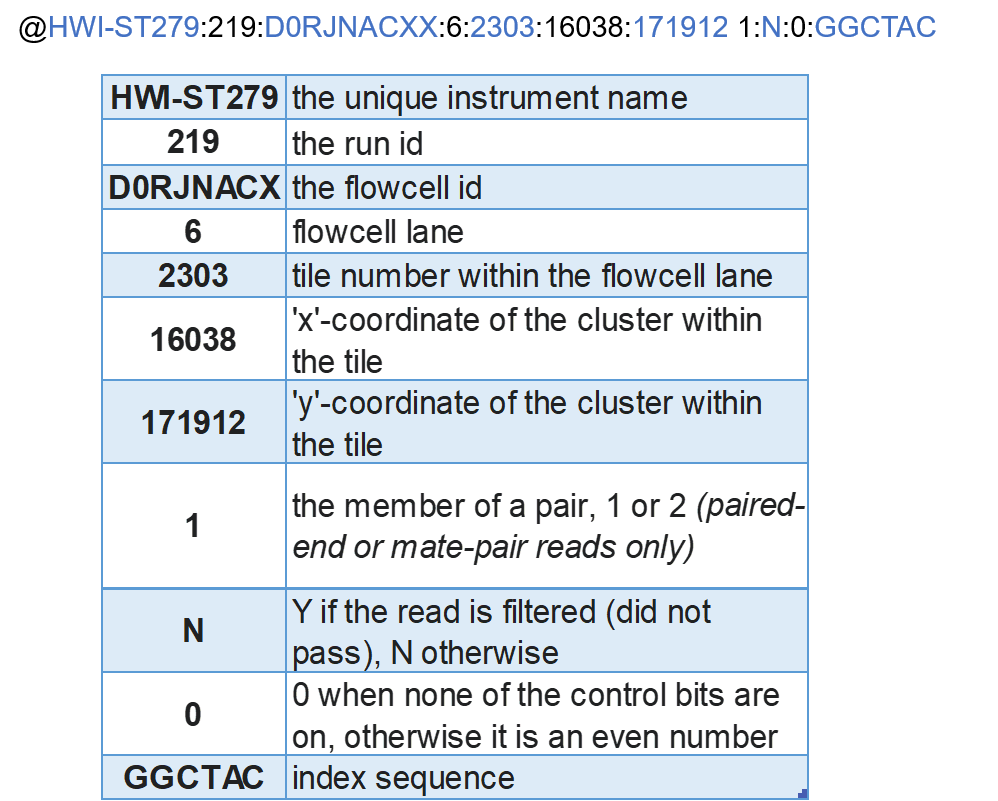
</div>
https://www.illumina.com/documents/products/datasheets/datasheet_genomic_sequence.pdf

### ¿Y el score de calidad?

Q score of 3 means P=0.5, meaning that there is a 50% chance the base is wrong,

<div>
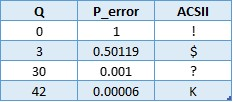
</div>

In [ ]:
from Bio import SeqIO
n = 0
for record in SeqIO.parse("Biopython/source/example.fastq", "fastq"):
    if n < 5:
        print("%s %s" % (record.id, record.seq))
        n +=1
    else:break
        
print ('\n',record.letter_annotations.keys())
print (record.letter_annotations["phred_quality"])

<p id="Ejercicio_3"></p>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 3</h2>
<ul>
</ul>
    <p>Obtén el <b>número</b> de lecturas cuyo promedio de calidad esté por debajo del umbral dado.</p>
<p><span class="given-return">Input:</span> Un umbral de calidad, Junto con un fastq.</p>

<h3 id="sample-dataset">Sample Dataset</h3>
<div class="codehilite"><pre>
@Rosalind_0041
GGCCGGTCTATTTACGTTCTCACCCGACGTGACGTACGGTCC
+
6.3536354;.151&lt;211/0?::6/-2051)-*&quot;40/.,+%)
@Rosalind_0041
TCGTATGCGTAGCACTTGGTACAGGAAGTGAACATCCAGGAT
+
AH@FGGGJ&lt;GB&lt;&lt;9:GD=D@GG9=?A@DC=;:?&gt;839/4856
@Rosalind_0041
ATTCGGTAATTGGCGTGAATCTGTTCTGACTGATAGAGACAA
+
@DJEJEA?JHJ@8?F?IA3=;8@C95=;=?;&gt;D/:;74792.
</pre></div>


<h3 id="sample-output">Sample Output</h3>
<div class="codehilite"><pre>1
</pre></div>
</div> 

In [ ]:
from Bio import SeqIO
from matplotlib.pyplot import *

# Get command-line arguments
lengths = []
# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    # Store read length
    lengths.append(len(read.seq))

    # sorted(lengths)
plot(sorted(lengths),'.')
xlabel('Secuence')
ylabel('Length')
show()
# savefig('readlengths.png')


In [ ]:

from matplotlib.pyplot import *
# Get command-line arguments
lengths1 = []
lengths2 = []

# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    phred_scores = read.letter_annotations["phred_quality"]
    l = 0
    for phsc in phred_scores:
        if phsc < 30:
            break
        l += 1
    lengths1.append(l)
    lengths2.append(len(read.seq))
# savefig('readlengths.png')
plot(sorted(lengths1),'.',sorted(lengths2),'.')
show()

In [ ]:
%%bash
head -8 ./archivos_trabajo/SRR020192.fastq

In [ ]:
import Bio.SeqIO

# Get command-line arguments

# Loop through all reads in inputfile
for read in SeqIO.parse("archivos_trabajo/SRR020192.fastq", "fastq"):
    # if the primer sequence is present
    if read.seq.startswith('GATGACGGTGT'):
        # remove it and output as FASTA
        read = read[11:]
        print(read.format("fastq"),end="")
        break


### NCBI

The National Center for Biotechnology Information advances science and health by providing access to biomedical and genomic informationm

Almacena y constantemente actualiza la información referente a secuencias genómicas en GenBank, un índice de artículos científicos referentes a biomedicina, biotecnología, bioquímica, genética y genómica en PubMed, una recopilación de enfermedades genéticas humanas en OMIM, además de otros datos biotecnológicos de relevancia en diversas bases de datos.

<a id="GenBank"></a>

## <span style="color:#957DAD">GenBank</span>

### ¿Qué es GenBank?

The GenBank sequence database is an open access, annotated collection of all publicly available nucleotide sequences and their protein translations. It is produced and maintained by the National Center for Biotechnology Information (NCBI; a part of the National Institutes of Health in the United States) as part of the International Nucleotide Sequence Database Collaboration (INSDC).

### Formato GenBank

<p>
Más información sobre el formato en el siguiente link: <a href="https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html">
<img alt="GenBank Format"src="attachment:Genbank.PNG" width="300">
</p>


In [ ]:
%%bash
less ./archivos_trabajo/aichi.gb

**source**

Mandatory feature in each record that summarizes the length of the sequence, scientific name of the source organism, and Taxon ID number. Can also include other information such as map location, strain, clone, tissue type, etc., if provided by submitter.


**CDS**

Coding sequence; region of nucleotides that corresponds with the sequence of amino acids in a protein (location includes start and stop codons). The CDS feature includes an amino acid translation. Authors can specify the nature of the CDS by using the qualifier "/evidence=experimental" or "/evidence=not_experimental".

**gene**
	
A region of biological interest identified as a gene and for which a name has been assigned. The base span for the gene feature is dependent on the furthest 5' and 3' features. 

### Consiguiendo anotaciones del archivo GenBank

Para leer secuencias de un archivo genbank, no hay muchos cambios.

In [ ]:
# from Bio import SeqIO
for gb_record in SeqIO.parse("archivos_trabajo/aichi.gb", "genbank"):
    print('ID',gb_record.id)
    print('Secuencia',str(gb_record.seq)[0:60],'...')
    print('Longitud',len(gb_record))

In [ ]:
atributos = gb_record.__dict__
atributos.keys()

In [ ]:
gb_record.annotations

In [ ]:
for i,feature in enumerate(gb_record.features):
    print("Feature",i+1,'\n',feature)

In [ ]:
feature.type

In [ ]:
feature.location.__dict__

In [ ]:
feature.location.nofuzzy_end

In [ ]:
start = feature.location.nofuzzy_start
end = feature.location.nofuzzy_end
value = gb_record.seq[start:end]


In [ ]:
value.translate()

### ¿Por qué no es la misma proteína?

In [ ]:
#feature.qualifiers



<a id="Ejercicio_4"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 4</h2>
<ul>
    El archivo hepatitis.gb contiene información sobre la región de ADN que codifica HBx, una proteína viral de la hepatitis B multifuncional involucrada en la modulación de varias vías al interactuar directa o indirectamente con factores del hospedero (degradación de proteínas, apoptosis, transcripción, transducción de señales, progreso del ciclo celular y estabilidad genética). Escribe un programa de Python que, utilizando este registro de genbank, guarde la secuencia de proteínas correspondiente en formato fasta.
    </ul>
</div>

<p id="#Protein_Data_Bank"></p>


<a id="Protein_Data_Bank"></a>

## <span style="color:#957DAD">Protein Data Bank</span>

El Protein Data Bank (PDB) (Banco de Datos de Proteínas) es una base de datos de la estructura tridimensional de las proteínas y ácidos nucleicos. Estos datos, generalmente obtenidos mediante cristalografía de rayos X o resonancia magnética nuclear, son enviados por biólogos y bioquímicos de todo el mundo. Están bajo el dominio público y pueden ser usados libremente.

 ###  Objeto Structure

El Objeto Structure sigue el formato llamado SMCRA (Structure/Model/Chain/Residue/-
Atom):
+ Un *structure* consiste de *models*
+ Un *model* consiste de *chains*
+ Un *chain* consiste de *residues*
+ Un *residue* consiste de *atoms*


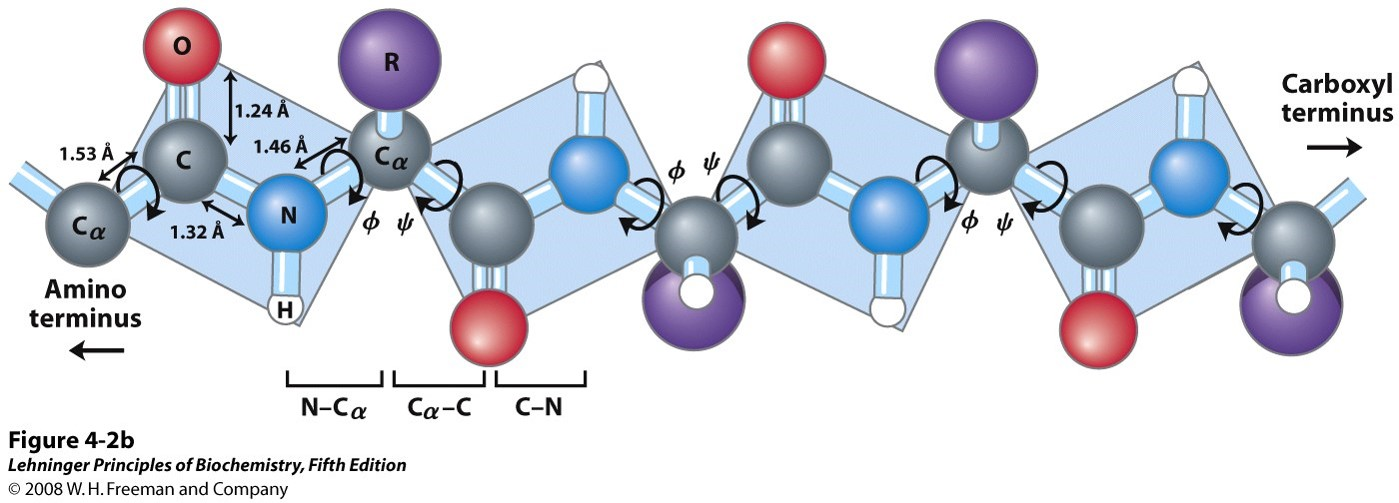

In [ ]:
# %%cmd
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[1-5]:"
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[100-102]:"
# findstr /n "."  .\archivos_trabajo\1fat.pdb | findstr "^[7500-7502]:"


In [ ]:
%%bash
head -n 5 ./archivos_trabajo/1fat.pdb
sed -n 100,102p ./archivos_trabajo/1fat.pdb
sed -n 7500,7502p ./archivos_trabajo/1fat.pdb

In [3]:
from Bio import PDB
parser = PDB.PDBParser(QUIET=True)
struc = parser.get_structure("prot_ifat", "../source/1fat.pdb")
n_atoms = 0
for model in struc:
    for chain in model:
        for residue in chain:
            print(residue.resname, residue.id)
            for atom in residue:
                
                n_atoms += 1
print(n_atoms)


SER (' ', 1, ' ')
ASN (' ', 2, ' ')
ASP (' ', 3, ' ')
ILE (' ', 4, ' ')
TYR (' ', 5, ' ')
PHE (' ', 6, ' ')
ASN (' ', 7, ' ')
PHE (' ', 8, ' ')
GLN (' ', 9, ' ')
ARG (' ', 10, ' ')
PHE (' ', 11, ' ')
ASN (' ', 12, ' ')
GLU (' ', 13, ' ')
THR (' ', 14, ' ')
ASN (' ', 15, ' ')
LEU (' ', 16, ' ')
ILE (' ', 17, ' ')
LEU (' ', 18, ' ')
GLN (' ', 19, ' ')
ARG (' ', 20, ' ')
ASP (' ', 21, ' ')
ALA (' ', 22, ' ')
SER (' ', 23, ' ')
VAL (' ', 24, ' ')
SER (' ', 25, ' ')
SER (' ', 26, ' ')
SER (' ', 27, ' ')
GLY (' ', 28, ' ')
GLN (' ', 29, ' ')
LEU (' ', 30, ' ')
ARG (' ', 31, ' ')
LEU (' ', 32, ' ')
THR (' ', 33, ' ')
ASN (' ', 34, ' ')
LEU (' ', 35, ' ')
ASN (' ', 36, ' ')
ASN (' ', 38, ' ')
GLY (' ', 39, ' ')
GLU (' ', 40, ' ')
PRO (' ', 41, ' ')
ARG (' ', 42, ' ')
VAL (' ', 43, ' ')
GLY (' ', 44, ' ')
SER (' ', 45, ' ')
LEU (' ', 46, ' ')
GLY (' ', 47, ' ')
ARG (' ', 48, ' ')
ALA (' ', 49, ' ')
PHE (' ', 50, ' ')
TYR (' ', 51, ' ')
SER (' ', 52, ' ')
ALA (' ', 53, ' ')
PRO (' ', 54, ' ')
IL

PHE (' ', 8, ' ')
GLN (' ', 9, ' ')
ARG (' ', 10, ' ')
PHE (' ', 11, ' ')
ASN (' ', 12, ' ')
GLU (' ', 13, ' ')
THR (' ', 14, ' ')
ASN (' ', 15, ' ')
LEU (' ', 16, ' ')
ILE (' ', 17, ' ')
LEU (' ', 18, ' ')
GLN (' ', 19, ' ')
ARG (' ', 20, ' ')
ASP (' ', 21, ' ')
ALA (' ', 22, ' ')
SER (' ', 23, ' ')
VAL (' ', 24, ' ')
SER (' ', 25, ' ')
SER (' ', 26, ' ')
SER (' ', 27, ' ')
GLY (' ', 28, ' ')
GLN (' ', 29, ' ')
LEU (' ', 30, ' ')
ARG (' ', 31, ' ')
LEU (' ', 32, ' ')
THR (' ', 33, ' ')
ASN (' ', 34, ' ')
LEU (' ', 35, ' ')
ASN (' ', 36, ' ')
ASN (' ', 38, ' ')
GLY (' ', 39, ' ')
GLU (' ', 40, ' ')
PRO (' ', 41, ' ')
ARG (' ', 42, ' ')
VAL (' ', 43, ' ')
GLY (' ', 44, ' ')
SER (' ', 45, ' ')
LEU (' ', 46, ' ')
GLY (' ', 47, ' ')
ARG (' ', 48, ' ')
ALA (' ', 49, ' ')
PHE (' ', 50, ' ')
TYR (' ', 51, ' ')
SER (' ', 52, ' ')
ALA (' ', 53, ' ')
PRO (' ', 54, ' ')
ILE (' ', 55, ' ')
GLN (' ', 56, ' ')
ILE (' ', 57, ' ')
TRP (' ', 58, ' ')
ASP (' ', 59, ' ')
ASN (' ', 60, ' ')
THR (' ', 61, 

In [5]:
n_atoms = 0
for atom in struc.get_atoms():
#     print (atom)
    n_atoms += 1
print(n_atoms)

7248


In [6]:
# for residue in model.get_residues():
#     print (residue)

In [7]:
atoms = struc.get_atoms()
residue = struc.get_residues()
atoms = chain.get_atoms()

In [8]:
for n in residue:
    print(n)
    break

<Residue SER het=  resseq=1 icode= >


In [9]:
#resseq  residue sequence number

In [10]:
n.get_full_id()

('prot_ifat', 0, 'A', (' ', 1, ' '))

In [11]:
atoms = n.get_atoms()

In [12]:
for atom in atoms:
    print(atom.id)
    break

N


In [13]:
# Obtiene todos los 'residues' de un 'structure'
res_list = PDB.Selection.unfold_entities(struc, "R")
# Obtiene todos los 'atoms' de una 'chain'
atom_list = PDB.Selection.unfold_entities(chain, "A")

A=atom, R=residue, C=chain, M=model, S=structure. Puedes utilizar
esto para subir en la jerarquía, eg. para obtener una lista (unica) de *Residue* o *Chain* similares de
una lista de *Atoms*:

In [14]:
residue_list = PDB.Selection.unfold_entities(atom_list, "R")
chain_list = PDB.Selection.unfold_entities(atom_list, "C")

¿Cómo extraigo un Atom/Residue/Chain/Model especifico de un *Structure*?
Fácil. Aquí hay unos ejemplos:
    

In [15]:
# https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/dealing-with-coordinates

In [16]:
model = struc[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

In [17]:
atom.element

'C'

In [18]:
residue

<Residue LYS het=  resseq=100 icode= >

Ten en cuenta que se puede utilizar un atajo:

In [19]:
atom=struc[0]["A"][100]["CA"]

In [20]:
chain_v2 = struc[0]["A"]
residue_v2 = struc[0]["A"][100]
atom_v2 = struc[0]["A"][100]["CA"]

In [21]:
residue_v2 == residue

True

También podemos obtener las coordenadas de los átomos

In [22]:
atom.get_coord()

array([ 28.073, -11.331,  56.355], dtype=float32)

#### ¿Qué es un model id?
El model id es un entero que denota el rango del modelo en el archivo PDB/mmCIF. el model id inicia en 0. Las estructuras de cristal generalmente tienen un solo modelo (con un id de 0), mientras que los archivos NMR usualmente contienen varios modelos.

####  ¿Qué es un chain id?
El chain id es especificado en el archivo PDB/mmCIF, solo es una cosa (usualmente; una letra).

#### ¿Qué es un residue id?
Esto es un poco más complicado, debido al torpe formato PDB. Un residue id es una tupla con 3 elementos:

El hetero-flag: Esto es 'H_' más el nombre del hetero-residue (e.g. 'H_GLC' en el caso de una molécula de glucosa), o 'W' en el caso de una molécula de agua.
El identificador de secuencia en la cadena, e.g. 100
El código de inserción, e.g. 'A'. El código de inserción a veces se utiliza para preservar un cierto esquema de numeración de residuos deseable. A Ser 80 inserción mutante (colocado e.g. entre un Thr 80 y un Asn 81 residue) podría e.g. tener identificadores de secuencia y códigos de inserción de la siguiente manera: Thr 80 A, Ser 80 B, Asn 81. De esta manera, el esquema de numeración de residuos se mantiene en sintonía con el de la wild type structure.
Así, el id del residuo de glucosa anterior sería ('H_GLC', 100, 'A'). Si el hetero-flag and y el código de inserción están vacios, se puede utilizar solamente el identificador de secuencia:

In [ ]:
# Full id
residue = chain[(" ", 100, " ")]
# Shortcut id
residue = chain[100]

<a id="Ejercicio_5"></a>

<div class="alert alert-block alert-info">    
<h2 id="problem">Ejercicio 5</h2>
<ul>
    
+ Consigue el *structure* del archivo pdb 4hhb

+ Imprime las coordenadas 3d del átomo C-alpha del aminoacido con residuo número 20 en chain C y asigna ese residuo a una variable.

+ Calcula el centro geométrico (centroid) del aminoacido mencionado anteriormente e imprímelo (esto asume que las masas de los átomos son iguales)

Para calular el centro geométrico se necesitan sacar las coordenadas de todos los átomos del residuo y sacar el promedio.
</ul>
</div>

Con el ejemplo del residuo utilizado en **clase** debe darles:
```python
>>> centroid(residue)
[27.96233346727159, -10.11222219467163, 56.41411124335395]
```


#### ¿Qué es un atom id?
El atom id simplemente es el nombre del átomo (eg. ’CA’). En práctica, el nombre del átomo es creado quitando todos los espacios del nombre del átomo en el archivo PDB.
Sin embargo, en los archivos PDB, un espacio puede ser parte del nombre de un átomo. A menudo, los átomos de calcio
son llamados ’CA..’ para así, distinguirlos de átomos Cα (que son llamados
’.CA.’). En casos en los que quitar los espacios pueda crear problemas (ie. 2 átomos llamados ’CA’ en el mismo residuo) los espacios se quedan.

In [ ]:
model = struc[0]
chain = model["A"]
residue = chain[100]
atom = residue["CA"]

In [ ]:
# OG hydrogen bonding

In [ ]:
%%bash
sed -n 7492,7505p ./archivos_trabajo/1fat.pdb

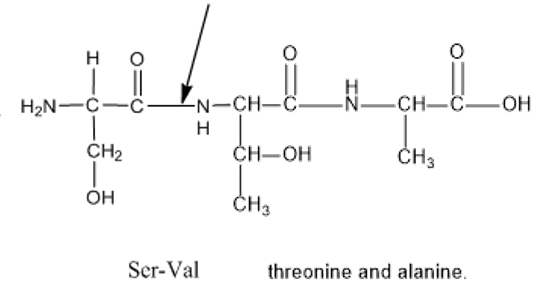

In [ ]:
import Bio.PDB.PDBParser

# Use QUIET=True to avoid lots of warnings...
model = struc[0]
achain = model['A']
for residue in achain:
    
    index = residue.get_id()[1]
    calpha = residue['CA']
    carbon = residue['C']
    nitrogen = residue['N']
    oxygen = residue['O']
    if index > 231:
        print("Residue:",residue.get_resname(),index)
        print("N  - Ca",(nitrogen - calpha))
        print("Ca - C ",(calpha - carbon))
        print("C  - O ",(carbon - oxygen))
        print()


In [ ]:
residue

In [ ]:
# model = struc[0]
# achain = model['A']
# for residue in achain:
#     a= residue['C']
#     break

In [ ]:
print("Residue:",residue.get_resname(),index)

In [ ]:
residue.get_full_id()

N-acetyl Glucosamine (NAG) 

In [ ]:
atoms_nag = residue.get_atoms()

In [ ]:
for atom in atoms_nag:
    print(atom.id, atom.element)

In [ ]:
residue.child_dict

In [ ]:
for residue in achain:
    index = residue.get_id()[1]
    calpha = residue['CA']
    carbon = residue['C']
    nitrogen = residue['N']
    oxygen = residue['O']

    print("Residue:",residue.get_resname(),index)
    print("N  - Ca",(nitrogen - calpha)) #Calcula automáticamente las distancias.
    print("Ca - C ",(calpha - carbon))
    print("C  - O ",(carbon - oxygen))

    if achain.has_id(index+1):
        nextresidue = achain[index+1]
        nextnitrogen = nextresidue['N']
        print("C  - N ",(carbon - nextnitrogen))
    if index == 3: break

    print()

<a id="BLAST_Output"></a>
## <span style="color:#957DAD">BLAST Output</span>

https://www.ncbi.nlm.nih.gov/
<div>
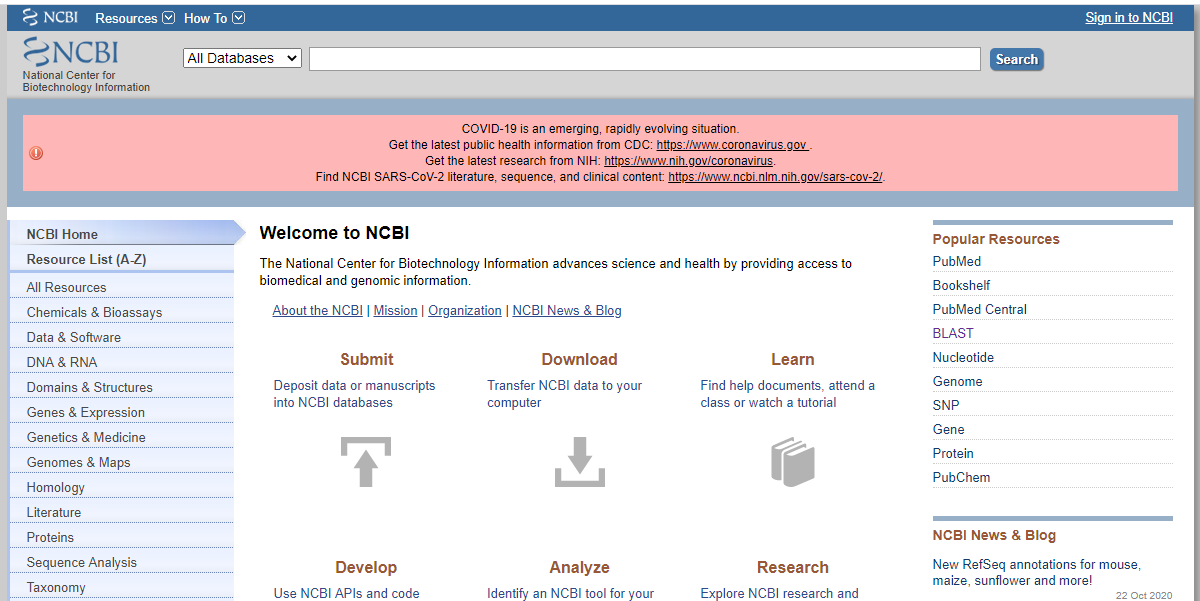
</div>

### BLAST

https://blast.ncbi.nlm.nih.gov/Blast.cgi
<div>
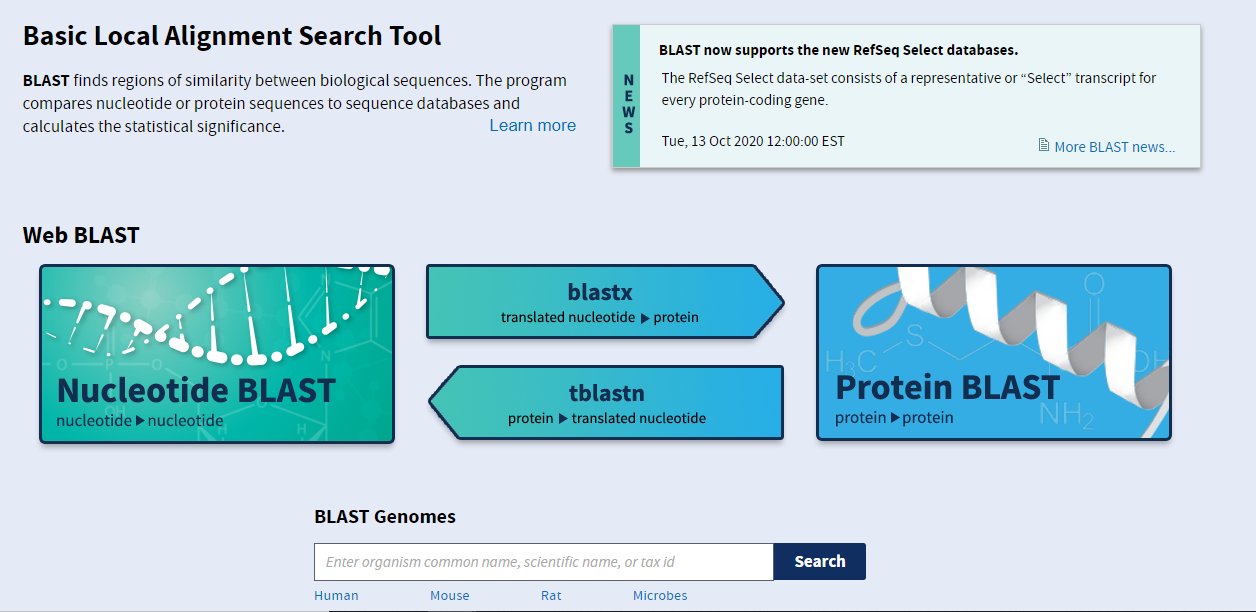
</div>

### Alineamiento local 

<div>
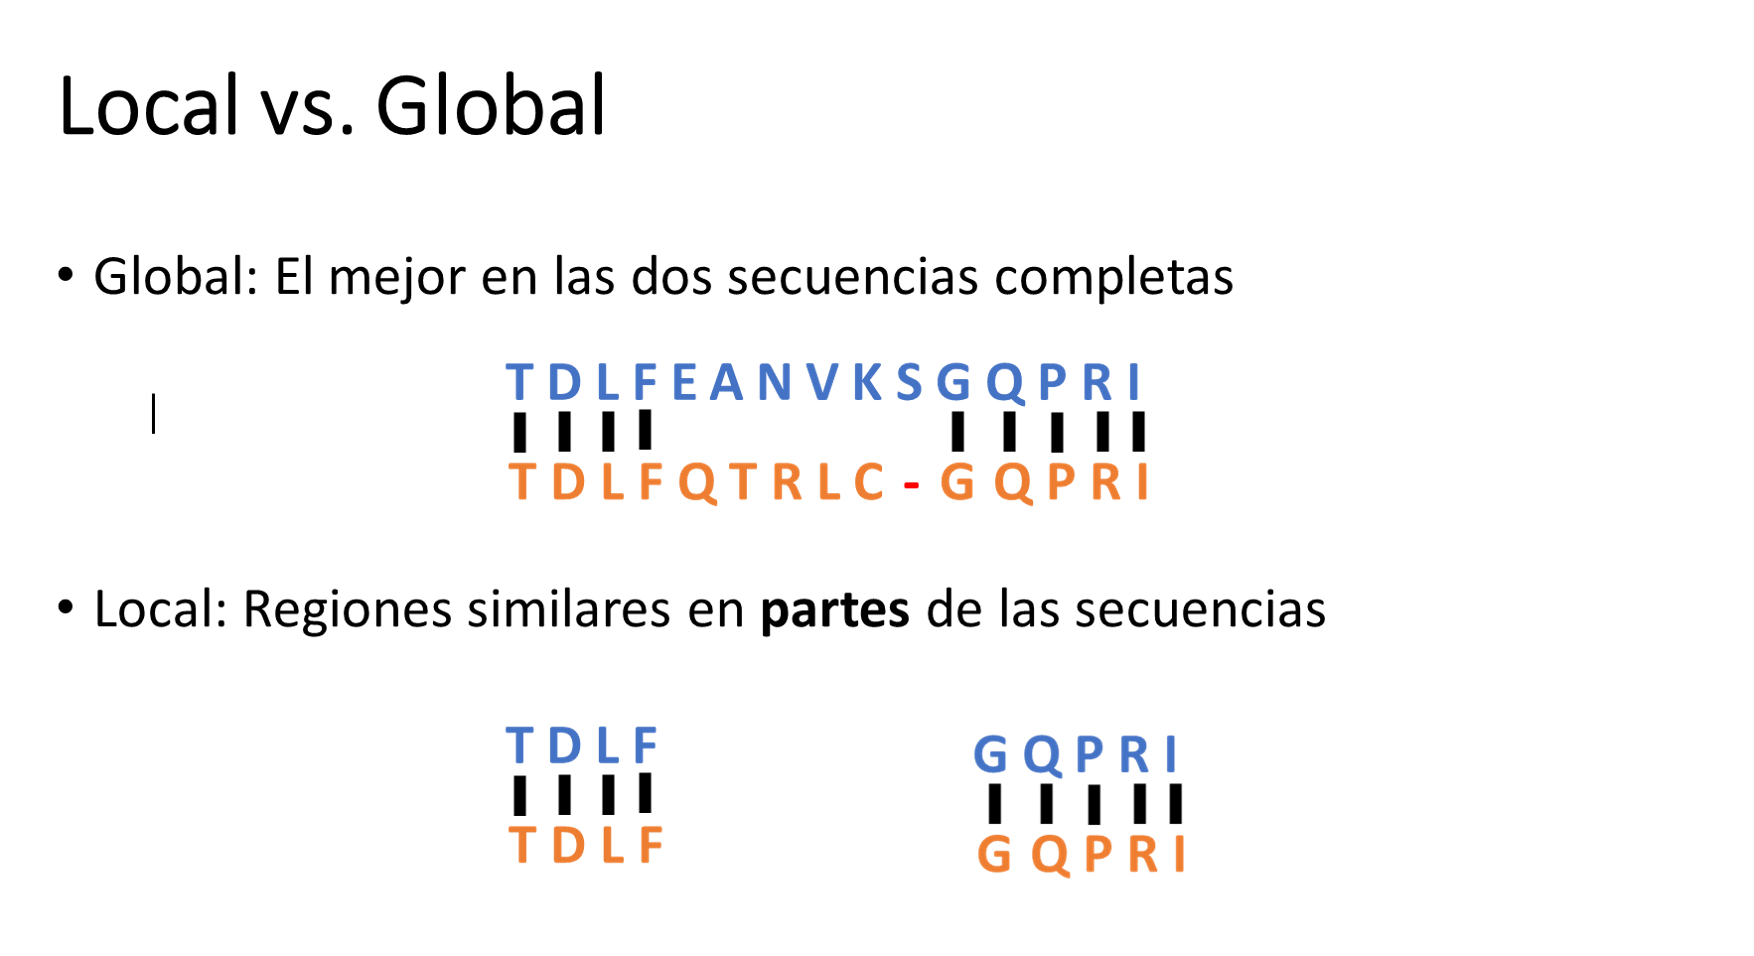
</div>



Para hacer un simple BLAST parsing, pregunta por el formato de salida en columnas separadas por tabulaciones (`-outfmt 6` or `-outfmt 7`) 


Si quieres parsear la sálida completa de blast con biopython, es mejor trabajar con XML formatted BLAST output `-outfmt 5`. Descifra el método parsing con menos facilidad. El código es estable para trabajar con NCBI blast.

Glosario de NCBI :
https://www.ncbi.nlm.nih.gov/books/NBK62051/#:~:text=A%20High%2Dscoring%20Segment%20Pair,often%20expressed%20as%20a%20percentage.


<div>
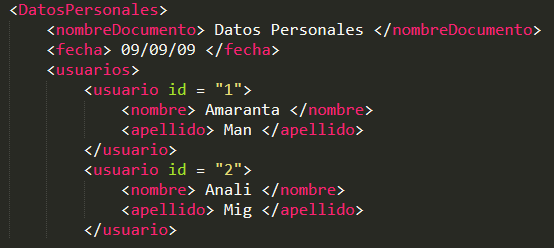
</div>


High-scoring Segment Pair (HSP) 

<div>
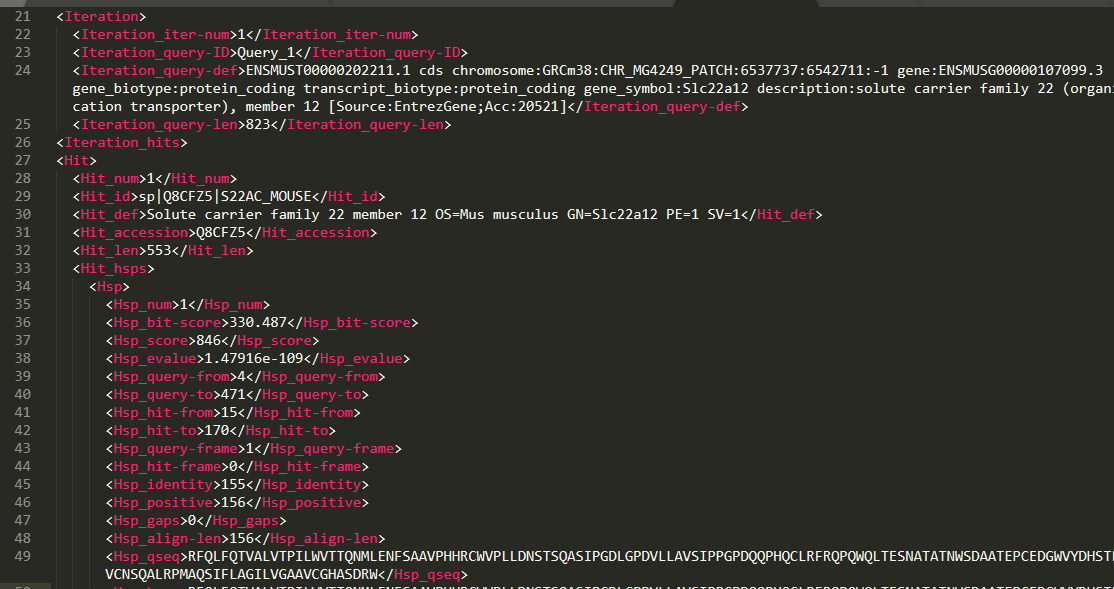
</div>


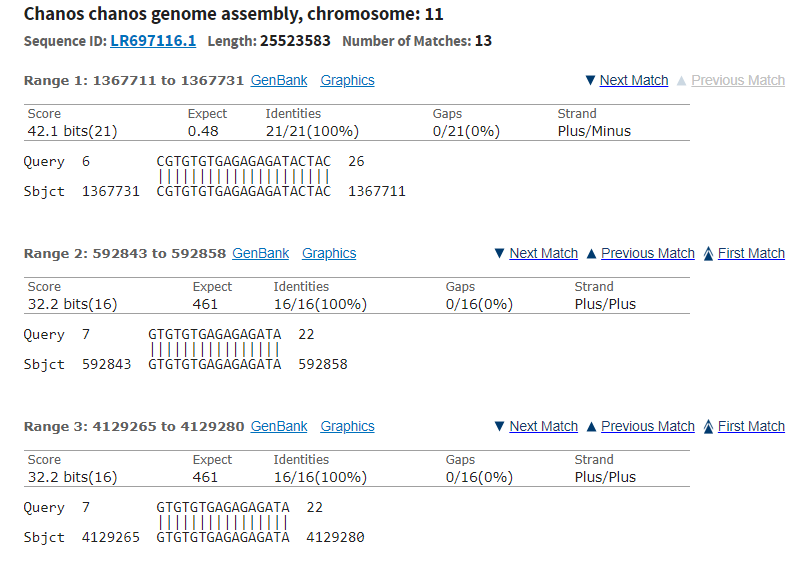

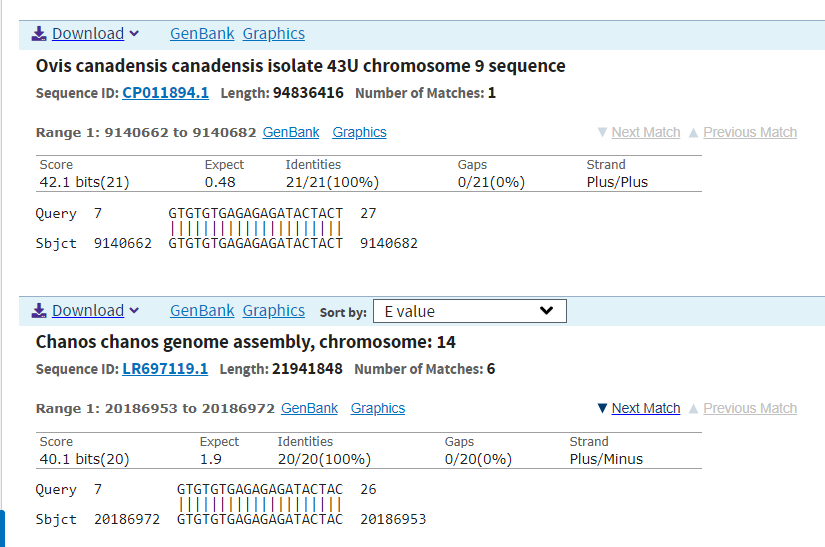

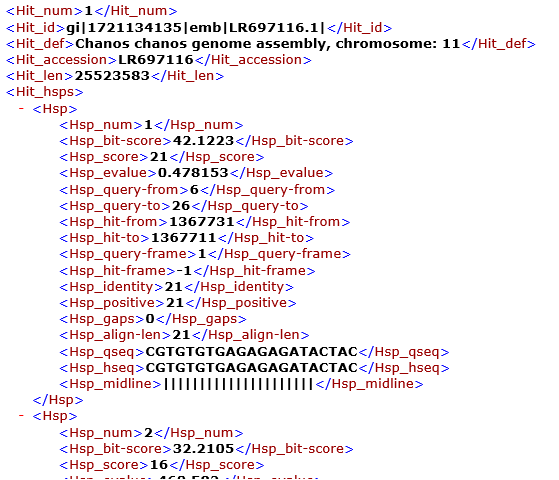

Para parsear el output, tendrás que escribir algo así

In [1]:
n = 0

from Bio.Blast import NCBIXML
result_handle = open("../source/test.blastout.xml")
blast_records = NCBIXML.parse(result_handle)
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            if n<5:
                print('id', alignment.title)
                print('E = ' , hsp.expect)
                n += 1
            else:
                break

id sp|Q8CFZ5|S22AC_MOUSE Solute carrier family 22 member 12 OS=Mus musculus GN=Slc22a12 PE=1 SV=1
E =  1.47916e-109
id sp|Q8CFZ5|S22AC_MOUSE Solute carrier family 22 member 12 OS=Mus musculus GN=Slc22a12 PE=1 SV=1
E =  1.20034e-74
id sp|Q3ZAV1|S22AC_RAT Solute carrier family 22 member 12 OS=Rattus norvegicus GN=Slc22a12 PE=2 SV=1
E =  7.69823e-103
id sp|Q3ZAV1|S22AC_RAT Solute carrier family 22 member 12 OS=Rattus norvegicus GN=Slc22a12 PE=2 SV=1
E =  1.31588e-62
id sp|Q96S37|S22AC_HUMAN Solute carrier family 22 member 12 OS=Homo sapiens GN=SLC22A12 PE=1 SV=1
E =  3.00718e-78


In [2]:
atributos = blast_record.__dict__
atributos.keys()

dict_keys(['gap_penalties', 'ka_params', 'effective_database_length', 'gapped', 'effective_hsp_length', 'ka_params_gap', 'gap_x_dropoff_final', 'expect', 'reference', 'num_seqs_better_e', 'query_letters', 'database_name', 'version', 'num_letters_in_database', 'num_hits', 'database', 'application', 'hsps_prelim_gapped_attemped', 'hsps_prelim_gapped', 'window_size', 'hsps_gapped', 'frameshift', 'num_sequences_in_database', 'descriptions', 'sc_match', 'hsps_no_gap', 'blast_cutoff', 'effective_search_space', 'query_id', 'num_good_extends', 'posted_date', 'database_letters', 'date', 'dropoff_1st_pass', 'matrix', 'effective_search_space_used', 'sc_mismatch', 'alignments', 'database_sequences', 'database_length', 'threshold', 'gap_x_dropoff', 'filter', 'multiple_alignment', 'gap_trigger', 'query_length', 'num_sequences', 'query', 'effective_query_length'])

In [3]:
atributos = alignment.__dict__
atributos.keys()

dict_keys(['length', 'hsps', 'hit_id', 'hit_def', 'accession', 'title'])

In [4]:
atributos = hsp.__dict__
atributos.keys()

dict_keys(['sbjct_end', 'query_end', 'query_start', 'num_alignments', 'frame', 'match', 'strand', 'sbjct_start', 'gaps', 'align_length', 'positives', 'bits', 'expect', 'score', 'sbjct', 'query', 'identities'])

In [5]:
blast_record.query_id

'Query_1'

In [22]:
alignment.hit_id


'sp|Q9Y267|S22AE_HUMAN'

In [7]:
hsp.expect

2.35119e-06

In [14]:
alignment.hit_def

'Solute carrier family 22 member 14 OS=Homo sapiens GN=SLC22A14 PE=2 SV=4'

In [27]:
hsp.num_alignments

https://www.youtube.com/watch?v=ZN3RrXAe0uM

El valor Esperado (E) es un parámetro que describe el número de éxitos que uno puede "esperar" ver cuando se busca en una base de datos de un tamaño particular. Disminuye exponencialmente al mismo tiempo que el Score (S) del match aumenta. Esencialmente, el valor E describe el ruido de fondo aleatorio.


<a id="Ejercicio_6"></a>

<div class="alert alert-block alert-info">
<h2 id="problem">Ejercicio 6</h2>

1. Usando el archivo test.blastout.xml parsea los resultados e imprime lo siguiente "queryName	hitID	e-value	hitDesc	Hsp_num" Si el valor es mejor (meno) que 1e-10. (el query name lo encuentran en el blast_record y el hitDesc dentro del alignment.hit_def)

```python
>>>blast_record.query_id
'Query_1'
>>>alignment.hit_id
'sp|Q9Y267|S22AE_HUMAN'
>>>alignment.hit_def
'Solute carrier family 22 member 14 OS=Homo sapiens GN=SLC22A14 PE=2 SV=4'
>>>hsp.expect
2.35119e-06
```


|Query Name|Hit ID|e-Value|Hit Description|Hsp Number|
|:---------:|:----:|:------:|:----:|:------:|
|Query_1|sp\|Q9Y267\|S22AE_HUMAN|2.35119e-06|Solute carrier family 22 member 14|1|

</div>

<a id="File_Format_Conversions"></a>

## <span style="color:#957DAD">Conversiones de formato de archivo</span>

Muchas son directas; otras, un poco más complicadas ya que el alfabeto no puede ser determinado desde los datos. Usualmente, es más fácil ir de formatos más complicados a más simples

In [ ]:
# from Bio import SeqIO
fasta_records = SeqIO.parse("archivos_trabajo/seq.nt.fa", "fasta")  
tab_records = SeqIO.write(fasta_records , 'seqs.tab' , 'tab')

Produce

In [ ]:
# %%cmd
# findstr /n "."  .\seqs.tab | findstr "^[1-5]:"

In [ ]:
%%bash
less ./seqs.tab


Aun más fácil es el método convert(). Vamos a intentar fastq a fasta.

In [ ]:
# from Bio import SeqIO
fasta_records = SeqIO.convert('archivos_trabajo/sample.fastq', 'fastq', 'sample.converted.fa', 'fasta')

In [ ]:
# %%cmd
# findstr /n "." .\archivos_trabajo\sample.fastq | findstr "^[1-5]:"
# printf '\n\n'
# findstr /n "."  .\sample.converted.fa  | findstr "^[1-5]:"

In [ ]:
%%bash
head -n 5 ./archivos_trabajo/sample.fastq
printf '\n\n'
head -n 5 ./sample.converted.fa

In [ ]:
with open("./archivos_trabajo/aichi.gb") as input_handle:
    with open("aichi.fasta", "w") as output_handle:
        sequences = SeqIO.parse(input_handle, "genbank")
        count = SeqIO.write(sequences, output_handle, "fasta")

print("Converted %i records" % count)

In [ ]:
# %%cmd
# findstr /n "." .\archivos_trabajo\aichi.gb | findstr "^[1-5]:" 

In [ ]:
%%bash
head -5 ./archivos_trabajo/aichi.gb

In [ ]:
# %%cmd
# findstr /n "." .\archivos_trabajo\aichi.gb | findstr "^[1-5]:" 

In [ ]:
#more

In [ ]:
%%bash
head -5 ./aichi.fasta

http://rosalind.info/problems/locations/